# Q. Neural Network 
* PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install keras

In [3]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.9.1-cp38-cp38-win_amd64.whl (444.1 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.4-cp38-cp38-win_amd64.whl (895 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.46.3-cp38-cp38-win_amd64.whl (3.5 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156 kB

In [4]:
import pandas as pd
import numpy 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [5]:
seed = 7
numpy.random.seed(seed)
Forestfire = pd.read_csv('forestfires.csv')
Forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
Forestfire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
Forestfire.shape

(517, 31)

In [8]:
Forestfire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Forestfire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
Forestfire.drop(['month','day'],axis=1,inplace=True)

In [11]:
Forestfire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
le = LabelEncoder()
Forestfire['size_category'] = le.fit_transform(Forestfire['size_category'])

In [13]:
Forestfire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
X = Forestfire.drop('size_category',axis=1)
y = Forestfire['size_category']

In [15]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=15,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413,), (104,))

In [19]:
model = Sequential()
model.add(Dense(28,input_dim=28,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(X_train,y_train,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
28/28 [==============================] - 0s 5ms/step - loss: 0.6138 - accuracy: 0.7065 - val_loss: 0.6138 - val_accuracy: 0.7445
Epoch 2/150
28/28 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7283 - val_loss: 0.5931 - val_accuracy: 0.7445
Epoch 3/150
28/28 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.7283 - val_loss: 0.5923 - val_accuracy: 0.7445
Epoch 4/150
28/28 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.7428 - val_loss: 0.5884 - val_accuracy: 0.7737
Epoch 5/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7536 - val_loss: 0.5965 - val_accuracy: 0.7883
Epoch 6/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7717 - val_loss: 0.5975 - val_accuracy: 0.8029
Epoch 7/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7971 - val_loss: 0.6057 - val_accuracy: 0.8029
Epoch 8/150
2

Epoch 59/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9964 - val_loss: 1.3730 - val_accuracy: 0.8102
Epoch 60/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9964 - val_loss: 1.4035 - val_accuracy: 0.8248
Epoch 61/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9891 - val_loss: 1.4062 - val_accuracy: 0.8102
Epoch 62/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9891 - val_loss: 1.4164 - val_accuracy: 0.8248
Epoch 63/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9964 - val_loss: 1.4353 - val_accuracy: 0.8102
Epoch 64/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9964 - val_loss: 1.4454 - val_accuracy: 0.8175
Epoch 65/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9964 - val_loss: 1.4531 - val_accuracy: 0.8102
Epoch 

28/28 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 2.0132 - val_accuracy: 0.8175
Epoch 117/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 2.0195 - val_accuracy: 0.8175
Epoch 118/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 2.0319 - val_accuracy: 0.8248
Epoch 119/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 2.0439 - val_accuracy: 0.8175
Epoch 120/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 2.0527 - val_accuracy: 0.8248
Epoch 121/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.0542 - val_accuracy: 0.8175
Epoch 122/150
28/28 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.0709 - val_accuracy: 0.8175
Epoch 123/150

In [22]:
y_pred_train = model.predict(X_train)
rounded = [round(x[0]) for x in y_pred_train]

13/13 [==============================] - 0s 500us/step


In [23]:
y_pred_train1 = pd.DataFrame(rounded)

In [24]:
y_pred_train1

,0
0,1
1,1
2,1
3,1
4,1
...,...
408,0
409,1
410,1
411,1


In [25]:
y_pred_test = model.predict(X_test)
rounded1    = [round(x[0]) for x in y_pred_test]

4/4 [==============================] - 0s 667us/step


In [26]:
y_pred_test1 = pd.DataFrame(rounded1)
y_pred_test1

,0
0,0
1,1
2,1
3,1
4,1
...,...
99,0
100,1
101,1
102,1


In [27]:
Accuracy_Train = model.evaluate(X_train,y_pred_train1,verbose=0)
Accuracy_Train

[0.018295785412192345, 1.0]

In [28]:
Accuracy_Test = model.evaluate(X_test,y_pred_test1,verbose=0)
Accuracy_Test

[0.03664736449718475, 1.0]

In [29]:
History = model.fit(X_test,y_pred_test1,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 0.9855 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 2/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9714
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9714
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9714
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9714
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0953 - val_accuracy: 0.9714
Epoch 8/150
7/7 [==========

7/7 [==============================] - 0s 3ms/step - loss: 2.5999e-04 - accuracy: 1.0000 - val_loss: 0.1188 - val_accuracy: 0.9714
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 2.5614e-04 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.9714
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 2.5277e-04 - accuracy: 1.0000 - val_loss: 0.1198 - val_accuracy: 0.9714
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 2.4912e-04 - accuracy: 1.0000 - val_loss: 0.1203 - val_accuracy: 0.9714
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 2.4597e-04 - accuracy: 1.0000 - val_loss: 0.1207 - val_accuracy: 0.9714
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 2.4314e-04 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.9714
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 2.3928e-04 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 0.9714
Epoch

Epoch 115/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4250e-04 - accuracy: 1.0000 - val_loss: 0.1397 - val_accuracy: 0.9714
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4151e-04 - accuracy: 1.0000 - val_loss: 0.1400 - val_accuracy: 0.9714
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4029e-04 - accuracy: 1.0000 - val_loss: 0.1402 - val_accuracy: 0.9714
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3904e-04 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 0.9714
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3801e-04 - accuracy: 1.0000 - val_loss: 0.1408 - val_accuracy: 0.9714
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3690e-04 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy: 0.9714
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3577e-04 - accuracy: 1.0000 - val_loss: 0.1414 - val_ac

In [30]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

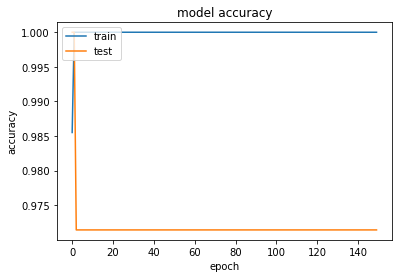

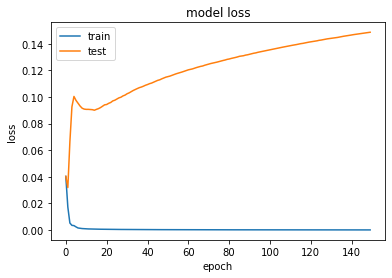

In [31]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Tuning of Hyperparameters : Batch Size and epochs

In [32]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [33]:
!pip install optimizers

  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2285 sha256=5957d7ac438304bc515b38dd3c9b23bfc2dc9cf6bb62e1bf8b016438b8d9b7b2
  Stored in directory: c:\users\farza\appdata\local\pip\cache\wheels\1d\e3\e3\f0a9b8fd8a9271274d03d4c15e4fed24a70b1d1b0f571bec66
Successfully built optimizers


In [34]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(30, input_dim=28, activation='relu'))
    model1.add(Dense(28, activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))
    
   
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

In [35]:
model2 = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model2,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   0.9s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   0.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   0.9s


In [36]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8876960396766662, using {'batch_size': 10, 'epochs': 100}
0.7346527338027954,0.09907131969869527 with: {'batch_size': 10, 'epochs': 10}
0.8625653505325317,0.062098651619333936 with: {'batch_size': 10, 'epochs': 50}
0.8876960396766662,0.04768251029343508 with: {'batch_size': 10, 'epochs': 100}
0.7461165070533753,0.14678828387197831 with: {'batch_size': 20, 'epochs': 10}
0.8450896143913269,0.053949119140279875 with: {'batch_size': 20, 'epochs': 50}
0.8528379440307617,0.07064903353595246 with: {'batch_size': 20, 'epochs': 100}
0.7305638432502747,0.15966032524782298 with: {'batch_size': 40, 'epochs': 10}
0.7655900001525879,0.0957791231665867 with: {'batch_size': 40, 'epochs': 50}
0.8296303272247314,0.06398875969487192 with: {'batch_size': 40, 'epochs': 100}


### From summary we can say best result ,when batch-size = 10 and epochs=100

## Tuning of Hyperparameter :Number of neurons in activation layer

In [37]:
def create_model1(neuron1,neuron2):
    model3 = Sequential()
    model3.add(Dense(neuron1,input_dim = 28,activation = 'relu'))
    model3.add(Dense(neuron2,activation = 'relu'))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model3


In [38]:
model4 = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 40,epochs = 10)
neuron1 = [24,28,35]
neuron2 = [20,24,28]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
grid2        = GridSearchCV(estimator = model4,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(x_scaled,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 1/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.5s
[CV 2/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 2/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.3s
[CV 3/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 3/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.3s
[CV 4/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 4/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.3s
[CV 5/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 5/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.3s
[CV 1/5; 2/9] START neuron1=24, neuron2=24......................................
[CV 1/5; 2/9] END ....................neuron1=24,

In [39]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7344846963882447, using {'neuron1': 28, 'neuron2': 24}
0.7306945562362671,0.12474564014577386 with: {'neuron1': 24, 'neuron2': 20}
0.7094099998474122,0.12249133394478744 with: {'neuron1': 24, 'neuron2': 24}
0.7248506307601928,0.1374873177534645 with: {'neuron1': 24, 'neuron2': 28}
0.7132748365402222,0.12528507201800687 with: {'neuron1': 28, 'neuron2': 20}
0.7344846963882447,0.1473974962192127 with: {'neuron1': 28, 'neuron2': 24}
0.7286967873573303,0.14351144456028408 with: {'neuron1': 28, 'neuron2': 28}
0.7288088202476501,0.11174212236669616 with: {'neuron1': 35, 'neuron2': 20}
0.7267923831939698,0.13468071675427679 with: {'neuron1': 35, 'neuron2': 24}
0.7133495092391968,0.10138080335830492 with: {'neuron1': 35, 'neuron2': 28}


####  From summary best result at 1st layer 28 Neuron and 2nd layer 24 neuron

### Tuning Hyperparameter : Activation function

In [40]:
def create_model2(activation_function):
    model4 = Sequential()
    model4.add(Dense(28,input_dim = 28,activation = activation_function))
    model4.add(Dense(24,activation = activation_function))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model4


In [41]:
model5 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 40,epochs = 10)
activation_function = ['softmax','relu','tanh']
param_grids = dict(activation_function=activation_function)
grid3        = GridSearchCV(estimator = model5,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(x_scaled,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START activation_function=softmax.................................
[CV 1/5; 1/3] END ...............activation_function=softmax; total time=   0.3s
[CV 2/5; 1/3] START activation_function=softmax.................................
[CV 2/5; 1/3] END ...............activation_function=softmax; total time=   0.3s
[CV 3/5; 1/3] START activation_function=softmax.................................
[CV 3/5; 1/3] END ...............activation_function=softmax; total time=   0.3s
[CV 4/5; 1/3] START activation_function=softmax.................................
[CV 4/5; 1/3] END ...............activation_function=softmax; total time=   0.3s
[CV 5/5; 1/3] START activation_function=softmax.................................
[CV 5/5; 1/3] END ...............activation_function=softmax; total time=   0.4s
[CV 1/5; 2/3] START activation_function=relu....................................
[CV 1/5; 2/3] END ..................activation_fu

In [42]:
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7558999180793762, using {'activation_function': 'tanh'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax'}
0.7267737030982971,0.14027757123023468 with: {'activation_function': 'relu'}
0.7558999180793762,0.11087344966471313 with: {'activation_function': 'tanh'}


### From summary best result when Activation function is 'tanh'